In [1]:
import numpy as np
import elementaries as el
import ansatzes as ans
import optimization as opt
import hamiltonians as ham
from scipy.optimize import minimize
import random

In [3]:
phi=0

J=1

z_generators=ham.single_qubit_paulis(3)
z_magnitude=-np.cos(phi)/el.number_of_qubits
x_generators=ham.single_qubit_paulis(1)
x_magnitude=np.sin(phi)/el.number_of_qubits
xx_generators=ham.two_qubit_strings(1,1)
xx_disorder_strength=J/(el.number_of_qubits**2)

hamiltonian_z=ham.constant_subhamiltonian(z_magnitude,z_generators)
hamiltonian_x=ham.constant_subhamiltonian(x_magnitude,x_generators)
hamiltonian_xx=ham.constant_subhamiltonian(xx_disorder_strength,xx_generators)

hamiltonian=hamiltonian_z+hamiltonian_xx
GS_energy=min(np.linalg.eig(hamiltonian)[0])


In [4]:
eig=np.linalg.eig(hamiltonian)

In [5]:
print(eig[0][0:10])
GS_state=np.transpose(eig[1])[1] #or [1]? check!
GS_state=GS_state/np.linalg.norm(GS_state)
print(GS_state[0])

[ 1.34686785+0.j -1.14002164+0.j  0.94962884+0.j  0.8839835 +0.j
 -0.8267461 +0.j -0.82130991+0.j -0.80510087+0.j -0.77878049+0.j
 -0.74467669+0.j  0.84811837+0.j]
(0.8711743232490059+0j)


In [6]:
lis=[]

for i in range(len(GS_state)):
    lis.append(list(map(int,list(format(i, 'b').zfill(el.number_of_qubits)))))  

#sorting everything according to full-QSA prescription: finding the right reordering
levels=[]

for element in lis:
    levels+=[sum(element)]

ind=np.array(levels).argsort()

GS_state_sorted=list(GS_state[ind])
levels=np.array(levels)[ind]

GS_state_stored=[[] for i in range(el.number_of_qubits+1)]

for i in range(2**el.number_of_qubits):
    GS_state_stored[levels[i]]+=[GS_state_sorted[i]]



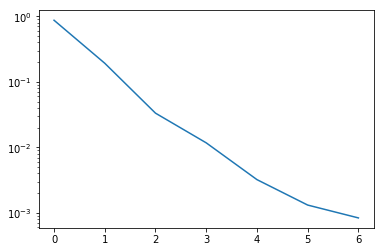

In [7]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# state_distribution=list(map(np.linalg.norm, GS_state_stored))

state_distribution=list(map(np.linalg.norm, GS_state_stored))/np.sqrt(list(map(len, GS_state_stored)))
# print(state_distribution)
ax.semilogy(list(range(el.number_of_qubits+1)),state_distribution)
# # plt.plot(np.arange(len(GS_state)),np.abs(GS_state))
plt.show()

In [95]:
from scipy.optimize import curve_fit

ylogdata=list(map(np.log,state_distribution[1:el.number_of_qubits//2+1]))

xdata=list(range(len(ylogdata)))

def func(x,a,b):
    return(a*x+b)
popt,pcov=curve_fit(func,xdata,ylogdata)

popt[0]

-0.19874646733307189

In [135]:
gammas+=[[J,np.exp(2*popt[0])]]
print(gammas)

[[1.0, 0.06099565420261809], [2.0, 0.11460718469314471], [3.0, 0.17969805701011676], [4.0, 0.24559140839146246], [5.0, 0.30837991758219624], [6.0, 0.36656028366183774], [7.0, 0.41931451940098685], [0.01, 0.0011389849746705964], [8, 0.46637250425944216], [10, 0.5444797325628298], [15, 0.6720026905541772]]


In [10]:
# gammas=[]

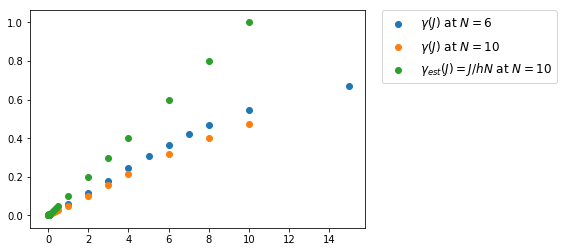

In [19]:
data6=np.transpose(np.array(gammas6))
data10=np.transpose(np.array(gammas10))
plt.scatter(data6[0],data6[1], label='$\gamma(J)$ at $N=6$')
plt.scatter(data10[0][0:21],data10[1][0:21], label='$\gamma(J)$ at $N=10$')
plt.scatter(data10[0][0:21],list(map(lambda x: x/10,data10[0][0:21])), label='$\gamma_{est}(J)=J/hN$ at $N=10$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='large')
plt.show()

In [8]:
gammas10=[[0.01, 0.0008670001937475444],
 [0.02, 0.0017041102029408614],
 [0.03, 0.0025113821471504003],
 [0.04, 0.003288924815289092],
 [0.05, 0.004036951062075093],
 [0.06, 0.0047558428389823946],
 [0.07, 0.005446237515348237],
 [0.08, 0.0061091370295299225],
 [0.09, 0.006746037454673157],
 [0.1, 0.007359068265849345],
 [0.2, 0.013040352101409209],
 [0.3, 0.018822370012390024],
 [0.4, 0.0236483131823062],
 [0.5, 0.027739430372579185],
 [1.0, 0.048964348257725485],
 [2.0, 0.10128524850445253],
 [3.0, 0.1587503354340971],
 [4.0, 0.2157042429856748],
 [6.0, 0.3177228770569615],
 [8.0, 0.4023588336333046],
 [10.0, 0.4723957934245768],
 [20.0, 0.6815315701238688],
 [40.0, 0.8278866153408737],
 [100.0, 0.9283000067642189]]

In [9]:
gammas6=[[1.0, 0.06099565420261809], [2.0, 0.11460718469314471], [3.0, 0.17969805701011676], [4.0, 0.24559140839146246], [5.0, 0.30837991758219624], [6.0, 0.36656028366183774], [7.0, 0.41931451940098685], [0.01, 0.0011389849746705964], [8, 0.46637250425944216], [10, 0.5444797325628298], [15, 0.6720026905541772]]